# Data Analysis

Objective: Quantitative analyse of data ...

In [16]:
import sqlite3, pandas as pd, numpy as np
from skimage.io import imread, imshow, imsave

In [64]:
con = sqlite3.connect("../cv-node-data/db/cvnode.db")
cur = con.cursor()

In [65]:
jobs = pd.read_sql_query("SELECT rowid, * from jobs", con, parse_dates=['begin_at', 'final_at'])
jobs.shape

(2, 7)

In [66]:
jobs.sort_values(by='rowid', ascending=False).head()

,rowid,begin_at,project_id,collect_id,thing_id,thing_tag,final_at
1,2,2025-01-13 18:03:19.358259,PR-9,CL-9,XY00-9,TG-00,2025-01-13 18:03:22.558581
0,1,2025-01-13 18:02:44.292068,PR-9,CL-9,XY00-9,TG-00,2025-01-13 18:02:52.313621


In [67]:
jobs['duration'] = jobs['final_at'] - jobs['begin_at']
jobs.sort_values(by='rowid', ascending=False).head()

,rowid,begin_at,project_id,collect_id,thing_id,thing_tag,final_at,duration
1,2,2025-01-13 18:03:19.358259,PR-9,CL-9,XY00-9,TG-00,2025-01-13 18:03:22.558581,0 days 00:00:03.200322
0,1,2025-01-13 18:02:44.292068,PR-9,CL-9,XY00-9,TG-00,2025-01-13 18:02:52.313621,0 days 00:00:08.021553


In [68]:
jobs.describe()

,rowid,duration
count,2.000000,2
mean,1.500000,0 days 00:00:05.610937500
std,0.707107,0 days 00:00:03.409125133
min,1.000000,0 days 00:00:03.200322
25%,1.250000,0 days 00:00:04.405629750
50%,1.500000,0 days 00:00:05.610937500
75%,1.750000,0 days 00:00:06.816245250
max,2.000000,0 days 00:00:08.021553


## Run

In [69]:
runs = pd.read_sql_query("SELECT rowid, * from runs", con, parse_dates=['begin_at', 'final_at'])
runs.shape

(25, 6)

In [70]:
runs.sort_values(by='rowid', ascending=False).head()

,rowid,begin_at,status,sensor,job_id,final_at
24,25,2025-01-13 18:03:22.543001,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.608828
23,24,2025-01-13 18:03:22.476601,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.539400
22,23,2025-01-13 18:03:22.407931,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.473099
21,22,2025-01-13 18:03:22.340938,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.404406
20,21,2025-01-13 18:03:22.276446,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.337412


In [71]:
runs_1 = runs.merge(
    jobs[['rowid', 'project_id', 'collect_id', 'thing_id', 'thing_tag']], 
    left_on='job_id', 
    right_on='rowid', 
    how='left').rename(columns={'rowid_x':'run_id'}).drop(columns=['rowid_y'])
runs_1.shape

(25, 10)

In [72]:
runs_1.sort_values(by='run_id', ascending=False).head()

,run_id,begin_at,status,sensor,job_id,final_at,project_id,collect_id,thing_id,thing_tag
24,25,2025-01-13 18:03:22.543001,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.608828,PR-9,CL-9,XY00-9,TG-00
23,24,2025-01-13 18:03:22.476601,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.539400,PR-9,CL-9,XY00-9,TG-00
22,23,2025-01-13 18:03:22.407931,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.473099,PR-9,CL-9,XY00-9,TG-00
21,22,2025-01-13 18:03:22.340938,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.404406,PR-9,CL-9,XY00-9,TG-00
20,21,2025-01-13 18:03:22.276446,CREATED,MaxSense - A075v,2,2025-01-13 18:03:22.337412,PR-9,CL-9,XY00-9,TG-00


## Itens

In [73]:
itens = pd.read_sql_query("SELECT rowid, * from itens", con)
itens.shape

(96, 7)

In [74]:
itens.sort_values(by='rowid', ascending=False).head()

,rowid,status,type,pov,res,file_path,run_id
95,96,STAGED,STATUS,TOP_DOWN,_320_240_1,TG-00_25_2025_01_13_18_03_22_546813_STATUS_320...,25
94,95,STAGED,IR,TOP_DOWN,_320_240_1,TG-00_25_2025_01_13_18_03_22_546813_IR_320_240...,25
93,94,STAGED,DEPTH,TOP_DOWN,_320_240_1,TG-00_25_2025_01_13_18_03_22_546813_DEPTH_320_...,25
92,93,STAGED,RGB,TOP_DOWN,_640_480_3,TG-00_25_2025_01_13_18_03_22_546813_RGB_640_48...,25
91,92,STAGED,STATUS,TOP_DOWN,_320_240_1,TG-00_24_2025_01_13_18_03_22_480049_STATUS_320...,24


In [47]:
itens.groupby('run_id').size().describe()

count    442.000000
mean       3.029412
std        1.405059
min        1.000000
25%        1.000000
50%        4.000000
75%        4.000000
max        4.000000
dtype: float64

## Data
$t = jobs * runs-per-job * items$

In [66]:
t = 23 * 265 * 4
print(f'{t} itens')

24380 itens


## Images

In [17]:
def adjust_scale(img, k=255):
    fm = img - img.min()
    return np.rint(k * (fm / fm.max())).astype(np.uint8)

In [28]:
target = imread('../cv-node-data/output/12/DEPTH/TG-00_355_2025_01_14_22_25_51_859817_DEPTH_320_240_1.png')
print(target.max())

1646


In [29]:
print(adjust_scale(target).max())

255


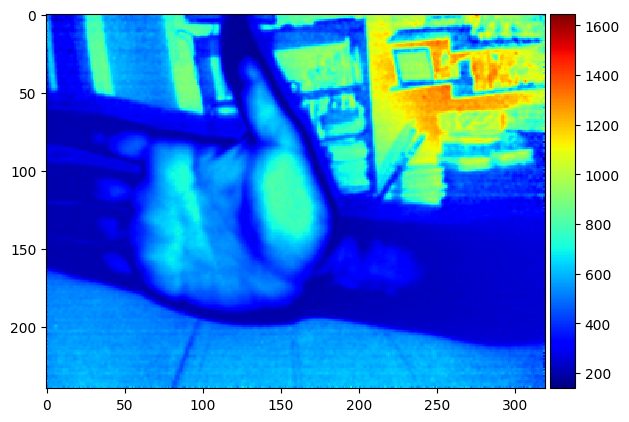

In [30]:
imshow(target, cmap='jet')

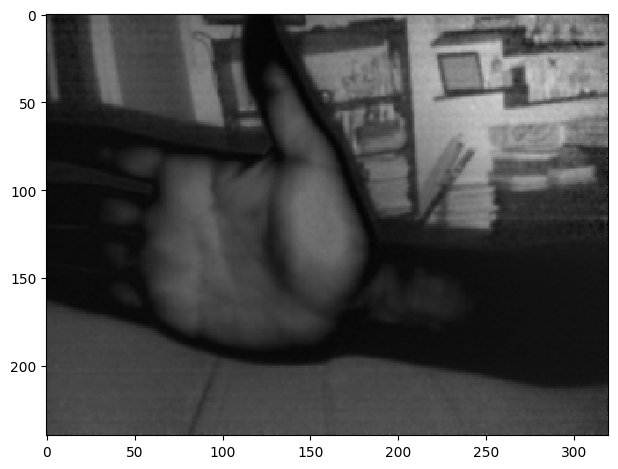

In [31]:
imshow(adjust_scale(target))